In [0]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)


testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)

tensor(7) tensor(4) tensor(8) tensor(3)


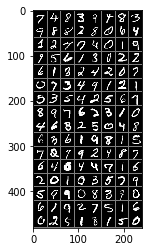

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % labels[j] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [0]:
# Loading model

# For loading to CPU, use the following:
#device = torch.device('cpu')
#model = Net()
#model.load_state_dict(torch.load('./MNIST.pt', map_location=device))


# For loading to GPU, use the following:
device = torch.device("cuda")
model = Net()
model.load_state_dict(torch.load('./MNIST.pt'))
model.to(device)

In [13]:
model.eval()

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

GroundTruth:  tensor(7) tensor(2) tensor(1) tensor(0) tensor(4) tensor(1) tensor(4) tensor(9) tensor(5) tensor(9) tensor(0) tensor(6) tensor(9) tensor(0) tensor(1) tensor(5) tensor(9) tensor(7) tensor(3) tensor(4) tensor(9) tensor(6) tensor(6) tensor(5) tensor(4) tensor(0) tensor(7) tensor(4) tensor(0) tensor(1) tensor(3) tensor(1) tensor(3) tensor(4) tensor(7) tensor(2) tensor(7) tensor(1) tensor(2) tensor(1) tensor(1) tensor(7) tensor(4) tensor(2) tensor(3) tensor(5) tensor(1) tensor(2) tensor(4) tensor(4) tensor(6) tensor(3) tensor(5) tensor(5) tensor(6) tensor(0) tensor(4) tensor(1) tensor(9) tensor(5) tensor(7) tensor(8) tensor(9) tensor(3) tensor(7) tensor(4) tensor(6) tensor(4) tensor(3) tensor(0) tensor(7) tensor(0) tensor(2) tensor(9) tensor(1) tensor(7) tensor(3) tensor(2) tensor(9) tensor(7) tensor(7) tensor(6) tensor(2) tensor(7) tensor(8) tensor(4) tensor(7) tensor(3) tensor(6) tensor(1) tensor(3) tensor(6) tensor(9) tensor(3) tensor(1) tensor(4) tensor(1) tensor(7) tensor

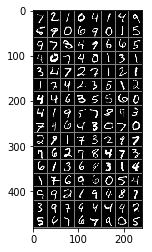

In [9]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % labels[j] for j in range(128)))

In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Next line is for GPU. If you are running on CPU, comment next line
        images, labels = images.to(device), labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 94 %
